**Bibliotecas**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from IPython.display import display, Markdown, Latex



# it's a library that we work with plotly
import seaborn as sns; sns.set()
import plotly.offline as py 
import plotly.express as px
py.init_notebook_mode(connected=True)                  # this code, allow us to work with offline plotly version
import plotly.graph_objs as go                         # it's like "plt" of matplot
import plotly.tools as tls                             # It's useful to we get some tools of plotly
from collections import Counter                        # To do counter of some features
import plotly.figure_factory as ff

sns.set_style('whitegrid')



**Carregando - German Credit Risk**

#German Credit Risk

O conjunto de dados original contém 1000 entradas com 20 atributos categoriais/simbólicos preparados pelo Prof. Dr. Hans Hofmann. Cada entrada neste conjunto de dados representa uma pessoa que recebe crédito de um banco. Cada pessoa é classificada como tendo riscos de crédito bons ou ruins de acordo com seus atributos. O link para o conjunto de dados original pode ser encontrado abaixo.

Original dataset: https://archive.ics.uci.edu/ml/datasets/Statlog+%28German+Credit+Data%29

Kaggle dataset: https://www.kaggle.com/datasets/uciml/german-credit?select=german_credit_data.csv

#Content


1. Age (numeric)
2. Sex (text: male, female)
3. Job (numeric: 0 - unskilled and non-resident, 1 - unskilled and resident, 2 - skilled, 3 - highly skilled)
4. Housing (text: own, rent, or free)
5. Saving accounts (text - little, moderate, quite rich, rich) 
6. Checking account (numeric, in DM - Deutsch Mark)
7. Credit amount (numeric, in DM)
8. Duration (numeric, in month)
9. Purpose (text: car, furniture/equipment, radio/TV, domestic appliances, repairs, education, business, vacation/others)
10. Risk (Value target - Good or Bad Risk)

In [ ]:
credit = pd.read_csv('/content/drive/MyDrive/HIAAC - FINANCE/german_credit_data.csv', index_col=0)

In [ ]:
credit.head()

,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose,Risk
0,67,male,2,own,NaN,little,1169,6,radio/TV,good
1,22,female,2,own,little,moderate,5951,48,radio/TV,bad
2,49,male,1,own,little,NaN,2096,12,education,good
3,45,male,2,free,little,little,7882,42,furniture/equipment,good
4,53,male,2,free,little,little,4870,24,car,bad


In [ ]:
credit["Purpose"].null( )


AttributeError: ignored

**Entendento o conjunto de dados**

**Histograma**

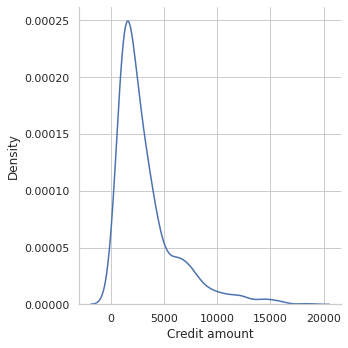

In [ ]:
sns.displot(credit, x="Credit amount", kind="kde")

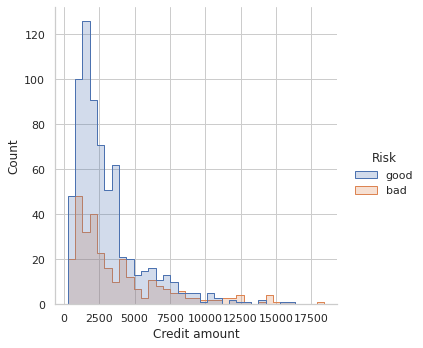

In [ ]:
sns.displot(credit, x="Credit amount", hue="Risk", element="step")

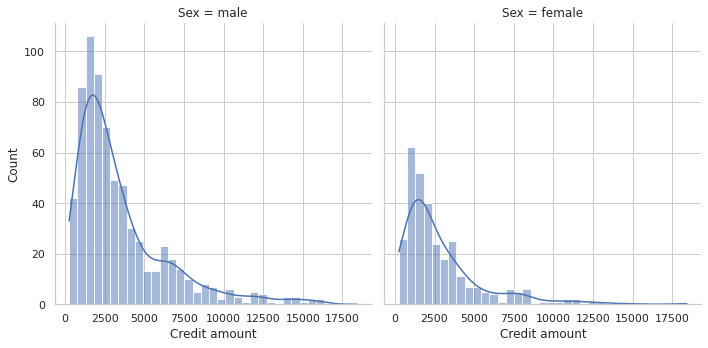

In [ ]:
sns.displot(credit, x="Credit amount", col="Sex", kde=True)

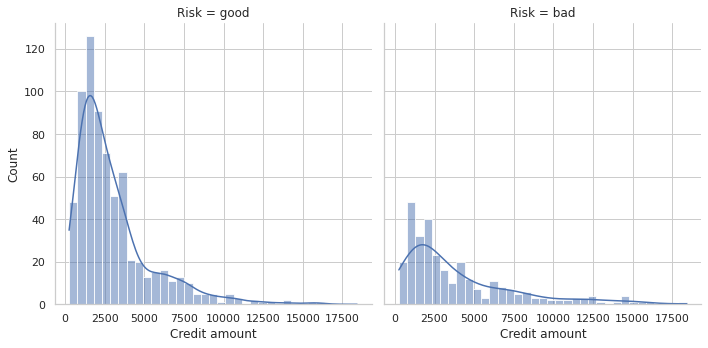

In [ ]:
sns.displot(credit, x="Credit amount", col="Risk", kde=True)

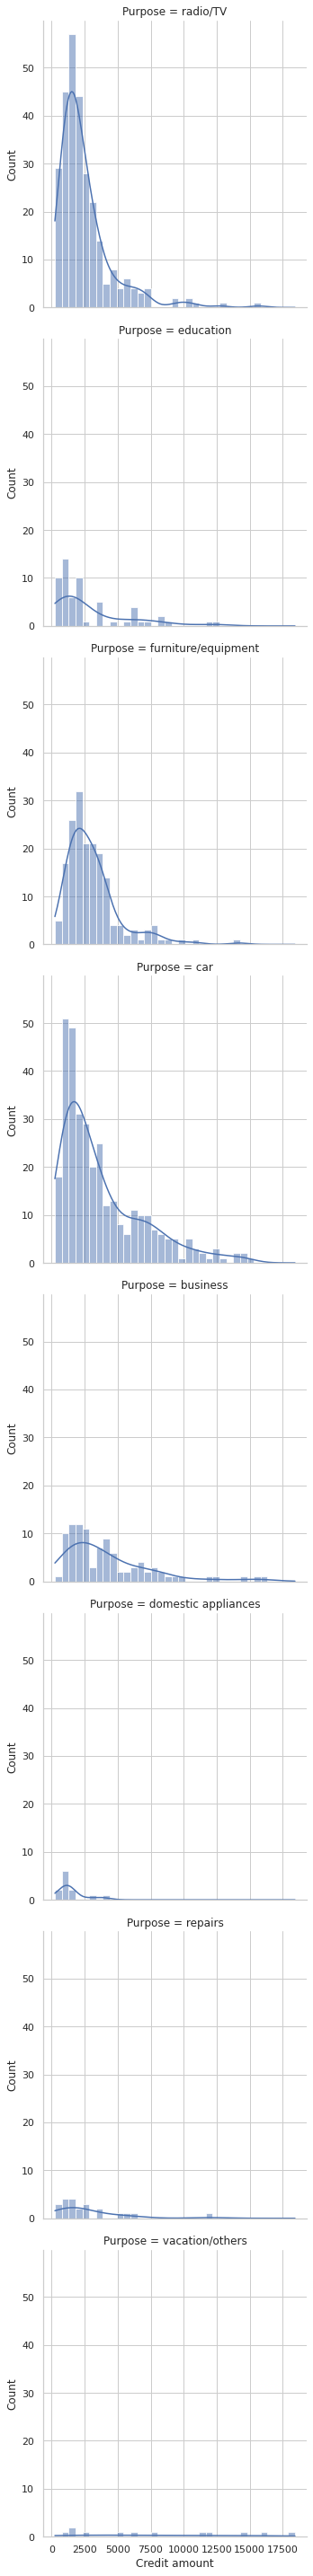

In [ ]:
sns.displot(credit, x="Credit amount", row="Purpose", kde=True)

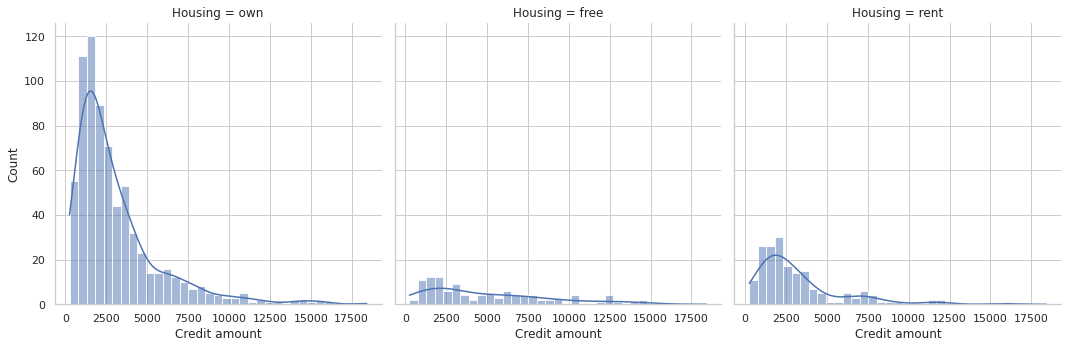

In [ ]:
sns.displot(credit, x="Credit amount", col="Housing", kde=True)

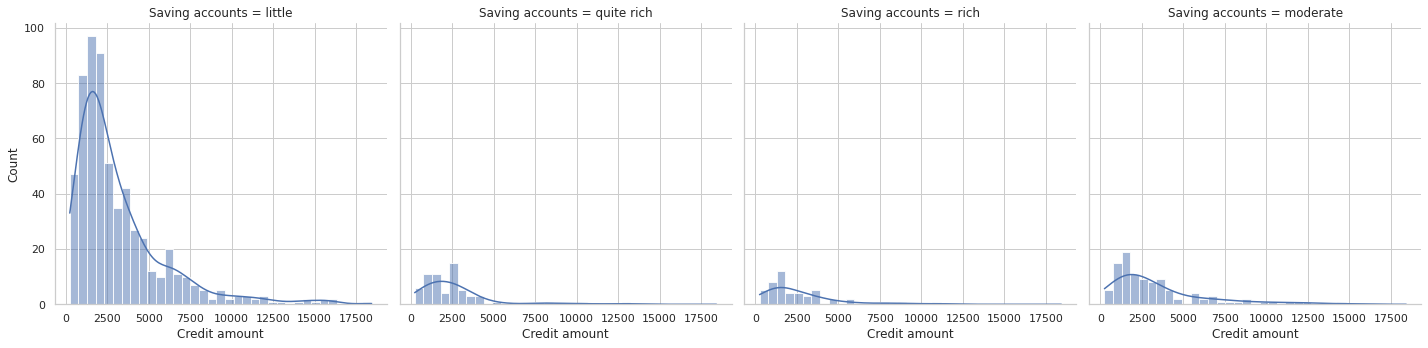

In [ ]:
sns.displot(credit, x="Credit amount", col="Saving accounts", kde=True)

**Gráfico de Barras**

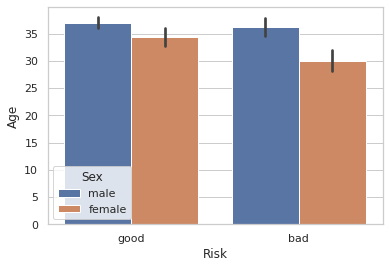

In [ ]:
sns.barplot(data=credit, x="Risk", y="Age", hue="Sex")


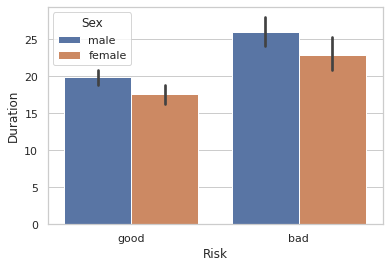

In [ ]:
sns.barplot(data=credit, x="Risk", y="Duration", hue="Sex")

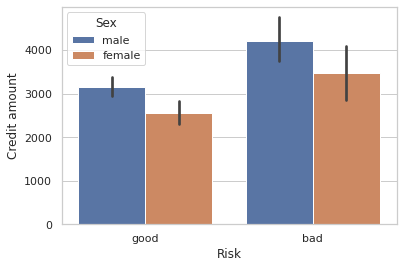

In [ ]:
sns.barplot(data=credit, x="Risk", y="Credit amount", hue="Sex") 

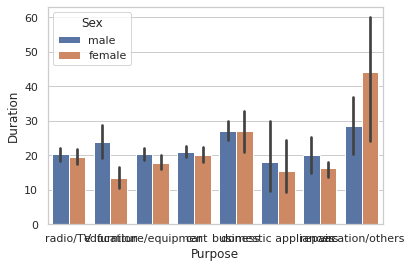

In [ ]:
sns.barplot(data=credit, x="Purpose", y="Duration", hue="Sex")

**Gráfico de Dispersão**

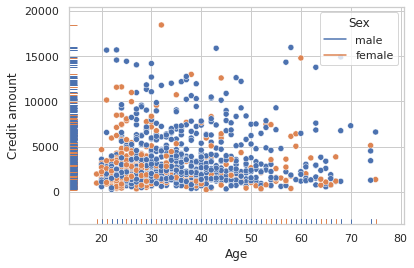

In [ ]:
sns.scatterplot(data=credit, x="Age", y="Credit amount", hue="Sex")
sns.rugplot(data=credit, x="Age", y="Credit amount", hue="Sex")

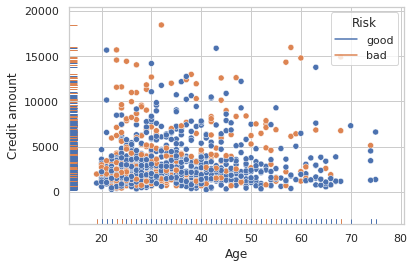

In [ ]:
sns.scatterplot(data=credit, x="Age", y="Credit amount", hue="Risk")
sns.rugplot(data=credit, x="Age", y="Credit amount", hue="Risk")

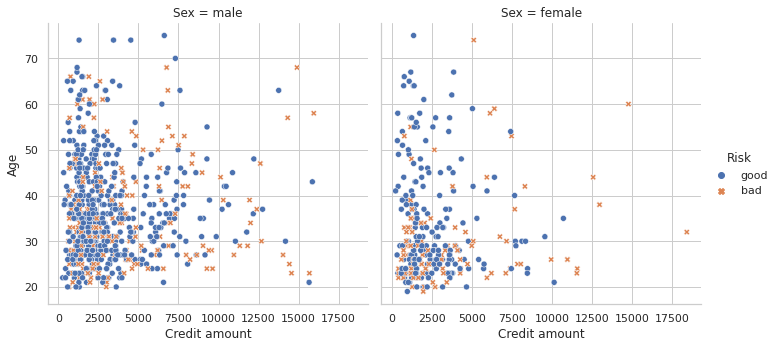

In [ ]:
sns.relplot(
    data=credit, x="Credit amount", y="Age",
    col="Sex", hue="Risk", style="Risk",
    kind="scatter"
)

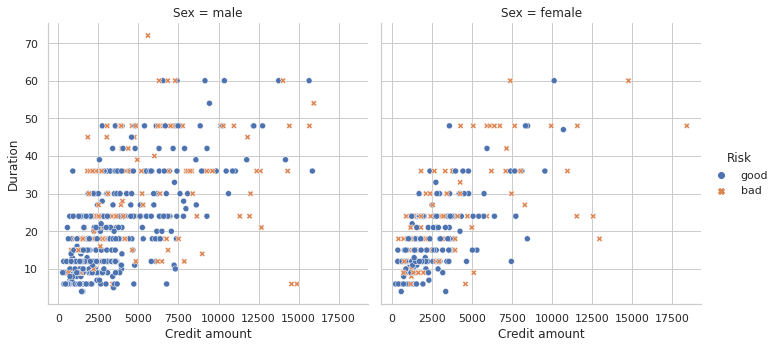

In [ ]:
sns.relplot(
    data=credit, x="Credit amount", y="Duration",
    col="Sex", hue="Risk", style="Risk",
    kind="scatter"
)

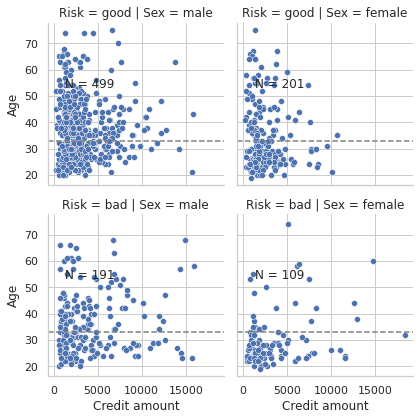

In [ ]:
import matplotlib.pyplot as plt
def annotate(data, **kws):
    n = len(data)
    ax = plt.gca()
    ax.text(.1, .6, f"N = {n}", transform=ax.transAxes)


g = sns.FacetGrid(credit, col="Sex",  row="Risk")
g.map(sns.scatterplot, "Credit amount", "Age")
g.refline(y=credit["Age"].median())
g.map_dataframe(annotate)
